In [1]:
import pickle
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

In [2]:
directory = '/mnt/home/jbielecki1/NEMA/10000000/'
modelFileName = 'ADA/adaEstimators1000Depth6'
max_depth = 6

In [3]:
model = pickle.load(open(directory + modelFileName, 'rb'))

In [20]:
X_test = pickle.load(open(directory + 'xTest', 'rb'))
y_test = pickle.load(open(directory + 'yTest', 'rb'))

In [21]:
class_test = y_test[["class"]].values
y_test = y_test[['newClass']].values

In [22]:
X_test_X1 = X_test['x1'].copy()
X_test_Y1 = X_test['y1'].copy()
X_test_rX1 = X_test['rX1'].copy()
X_test_rY1 = X_test['rY1'].copy()
X_test_X2 = X_test['x2'].copy()
X_test_Y2 = X_test['y2'].copy()

In [23]:
print(np.mean(X_test['x1']))
print(np.mean(X_test['y1']))
print(np.mean(X_test['rX1']))
print(np.mean(X_test['rY1']))
print(np.mean(X_test['x2']))
print(np.mean(X_test['y2']))

-0.033595665000000004
-0.8227719500000003
0.14857144873183925
-0.7163793976775018
-0.005028174999999989
-0.8241907650000001


In [24]:
X_test['x1'] = X_test_Y1
X_test['y1'] = X_test_X1
X_test['rX1'] = X_test_rY1
X_test['rY1'] = X_test_rX1
X_test['x2'] = X_test_Y2
X_test['y2'] = X_test_X2

In [25]:
print(np.mean(X_test['x1']))
print(np.mean(X_test['y1']))
print(np.mean(X_test['rX1']))
print(np.mean(X_test['rY1']))
print(np.mean(X_test['x2']))
print(np.mean(X_test['y2']))

-0.8227719500000003
-0.033595665000000004
-0.7163793976775018
0.14857144873183925
-0.8241907650000001
-0.005028174999999989


In [26]:
test_accuracy = []
max_acc = 0
y_pred_prob = []
y_pred = []

for test_predicts_el in model.staged_predict_proba(X_test):
    y_pred_prob_el = test_predicts_el[:,1]
    y_pred_el = y_pred_prob_el > 0.5
    acc = accuracy_score(y_pred_el, np.array(y_test))
    
    if acc > max_acc:
        max_acc = acc
        y_pred_prob = y_pred_prob_el
        y_pred = y_pred_el
        
    test_accuracy.append(acc)

In [27]:
bestAccuracy = max(test_accuracy)
bestNEstimators = test_accuracy.index(max(test_accuracy))

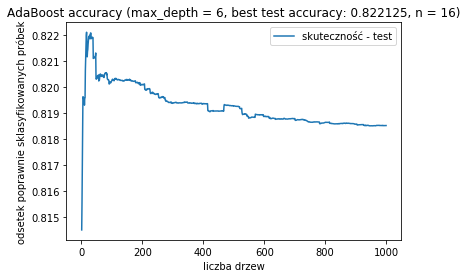

In [28]:
plt.plot([i+1 for i in range(len(test_accuracy))], test_accuracy, label = "skuteczność - test")
plt.xlabel("liczba drzew")
plt.ylabel("odsetek poprawnie sklasyfikowanych próbek")
plt.title("AdaBoost accuracy (max_depth = " + str(max_depth) + ", best test accuracy: " + str(bestAccuracy) + ", n = " + str(bestNEstimators) + ")")
plt.legend(loc = "upper right")

In [29]:
pPsOrginalPositive = X_test[y_test > 0]
pPsOrginalNegative = X_test[y_test == 0]
pPsPredictedPositive = X_test[y_pred]
pPsPredictedNegative = X_test[y_pred == 0]

In [30]:
FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

In [31]:
ACC = (TP + TN)/len(X_test) # accuracy
TPR = TP/(TP + FN) # recall
TNR = TN/(TN + FP) # selectivity
PPV = TP/(TP + FP) # precision
FPR = FP/(FP + TN) # background acceptance

print("Negative events (starting point of accuracy): " + str(len(y_test[y_test != 1])/len(y_test)*100.0) + "%")
print("Accuracy: " + str(ACC*100) + "%")
print("Recall: " + str(TPR*100) + "%")
print("Selectivity: " + str(TNR*100) + "%")
print("Precision: " + str(PPV*100) + "%")
print("Backgroung acceptance: " + str(FPR*100) + "%")

Negative events (starting point of accuracy): 70.79915%
Accuracy: 82.2125%
Recall: 75.50105561995628%
Selectivity: 84.98061064292438%
Precision: 67.46199191874067%
Backgroung acceptance: 15.019389357075616%
